<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
import numpy as np

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) =  boston_housing.load_data()

In [3]:
np.shape(X_train), np.shape(y_train)

((404, 13), (404,))

In [4]:
# Normalize Data
X_train = tf.keras.utils.normalize(X_train, axis=1)
y_train = tf.keras.utils.normalize(y_train)
X_test = tf.keras.utils.normalize(X_test)
y_test = tf.keras.utils.normalize(y_test)

In [5]:
# Make feed forward network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(128, activation=tf.nn.relu))
# tf.keras.activations.linear
model.add(Dense(1, activation=tf.keras.activations.sigmoid))

In [6]:
# Use mean squared error as the loss since the it's 
#   a regression problem
# https://www.tensorflow.org/tutorials/keras/regression
#  optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae', 'mse'])

In [7]:
history = model.fit(X_train, y_train.T, epochs=300, verbose=0)

In [8]:
history.history.keys()

dict_keys(['loss', 'mae', 'mse'])

In [9]:
# loss metric goes down steadily but would
# be better if it it were faster
import seaborn as sns
import matplotlib.pyplot as plt
plt.title('Loss Metric over time')
x = range(len(history.history['loss']))
plt.xlabel('Epoch')
plt.ylabel('MSE')
sns.lineplot(x=x[3:],y=history.history['loss'][3:]);

In [10]:
print(f'Finall loss:', history.history['loss'][-1])

Finall loss: 0.00012899867298155285


In [11]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train.T)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
from sklearn.model_selection import cross_val_score
# Neural Network did better than the simple linear regression model
np.mean(np.abs(cross_val_score(linear_model, X_train, y_train.T, scoring='neg_mean_squared_error')))

/home/me/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.00011177477711063427

In [13]:
y_pred = model.predict([X_test])

In [14]:
y_pred[0:5]

array([[0.01580933],
       [0.04046974],
       [0.0467383 ],
       [0.0669817 ],
       [0.05213004]], dtype=float32)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  1792      
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  16512     
_________________________________________________________________
dense_2 (Dense)              multiple                  129       
Total params: 18,433
Trainable params: 18,433
Non-trainable params: 0
_________________________________________________________________


In [16]:
# mean squared error = 0.0034
scores = model.evaluate(X_test, y_test.T)

102/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [17]:
y_pred[:,0]

array([0.01580933, 0.04046974, 0.0467383 , 0.0669817 , 0.05213004,
       0.03970093, 0.06052279, 0.0511952 , 0.0348874 , 0.04425967,
       0.02711639, 0.04069576, 0.03485852, 0.07807004, 0.03753796,
       0.0436236 , 0.04569808, 0.04332113, 0.04191509, 0.0508486 ,
       0.02652717, 0.02586237, 0.04314119, 0.02985042, 0.04488462,
       0.04755649, 0.05758372, 0.07047144, 0.02156681, 0.04460421,
       0.04611173, 0.02590668, 0.07022047, 0.04299185, 0.03782427,
       0.02016175, 0.0296019 , 0.03550968, 0.04245424, 0.05847159,
       0.05206403, 0.05429494, 0.03859839, 0.06342399, 0.08038953,
       0.04725069, 0.06241918, 0.03555751, 0.05120784, 0.04579946,
       0.06993133, 0.03331995, 0.02855244, 0.02986795, 0.06459546,
       0.05694288, 0.03459659, 0.0703392 , 0.07550445, 0.05257916,
       0.04733875, 0.04063588, 0.02764773, 0.04324389, 0.05342865,
       0.05261046, 0.03421414, 0.05395415, 0.02279097, 0.02447534,
       0.04945472, 0.05396006, 0.04738617, 0.0288097 , 0.04981

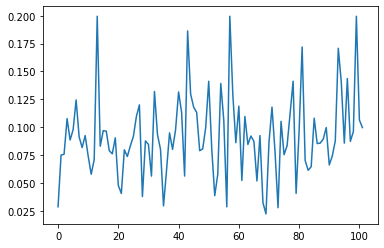

In [18]:
import matplotlib.pyplot as plt
x = range(len(y_test.T[:, 0]))
sns.lineplot(x=x,y=y_test.T[:, 0])

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [19]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [20]:
X_train.shape

(60000, 28, 28)

In [21]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [22]:
batch_size = 64
num_classes = len(set(y_train))
epochs = 20

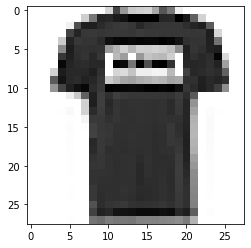

In [23]:
plt.imshow(X_train[1], cmap='binary')

#### One Hot Encode target for soft max

In [24]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [25]:
from tensorflow.keras.layers import Flatten

model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(128, activation=tf.nn.relu))
# tf.keras.activations.linear
model.add(Dense(num_classes, activation=tf.nn.softmax))

In [26]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
history = model.fit(X_train, y_train, epochs=epochs)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 62us/sample - loss: 0.5173 - accuracy: 0.8092
Epoch 2/20
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3875 - accuracy: 0.8562
Epoch 3/20
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3555 - accuracy: 0.8690
Epoch 4/20
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3327 - accuracy: 0.8757
Epoch 5/20
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3166 - accuracy: 0.8815
Epoch 6/20
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3025 - accuracy: 0.8862
Epoch 7/20
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2934 - accuracy: 0.8895
Epoch 8/20
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2796 - accuracy: 0.8941
Epoch 9/20
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2734 - accuracy: 0.8971
Epoch 10/20
60

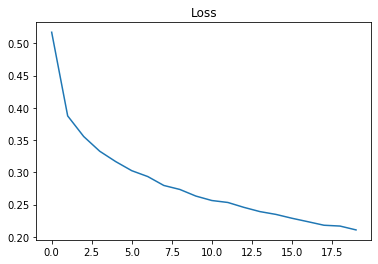

In [32]:
x = range(len(history.history['loss']))
plt.title('Loss')
sns.lineplot(x=x, y=history.history['loss'])

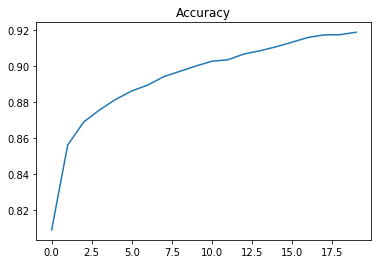

In [35]:
plt.title('Accuracy')
sns.lineplot(x=x, y=history.history['accuracy'])

In [36]:
predictions = model.predict([X_test])

In [38]:
np.argmax(predictions[0])

9

In [40]:
np.argmax(y_test[0])

9

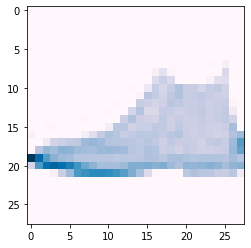

In [63]:
plt.imshow(X_test[0], cmap='PuBu')

In [66]:
val_loss, val_acc = model.evaluate(X_test, y_test, verbose=0);

In [68]:
## 88 percent accuracy on the test set
val_loss, val_acc

(0.3257529437661171, 0.8884)

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.